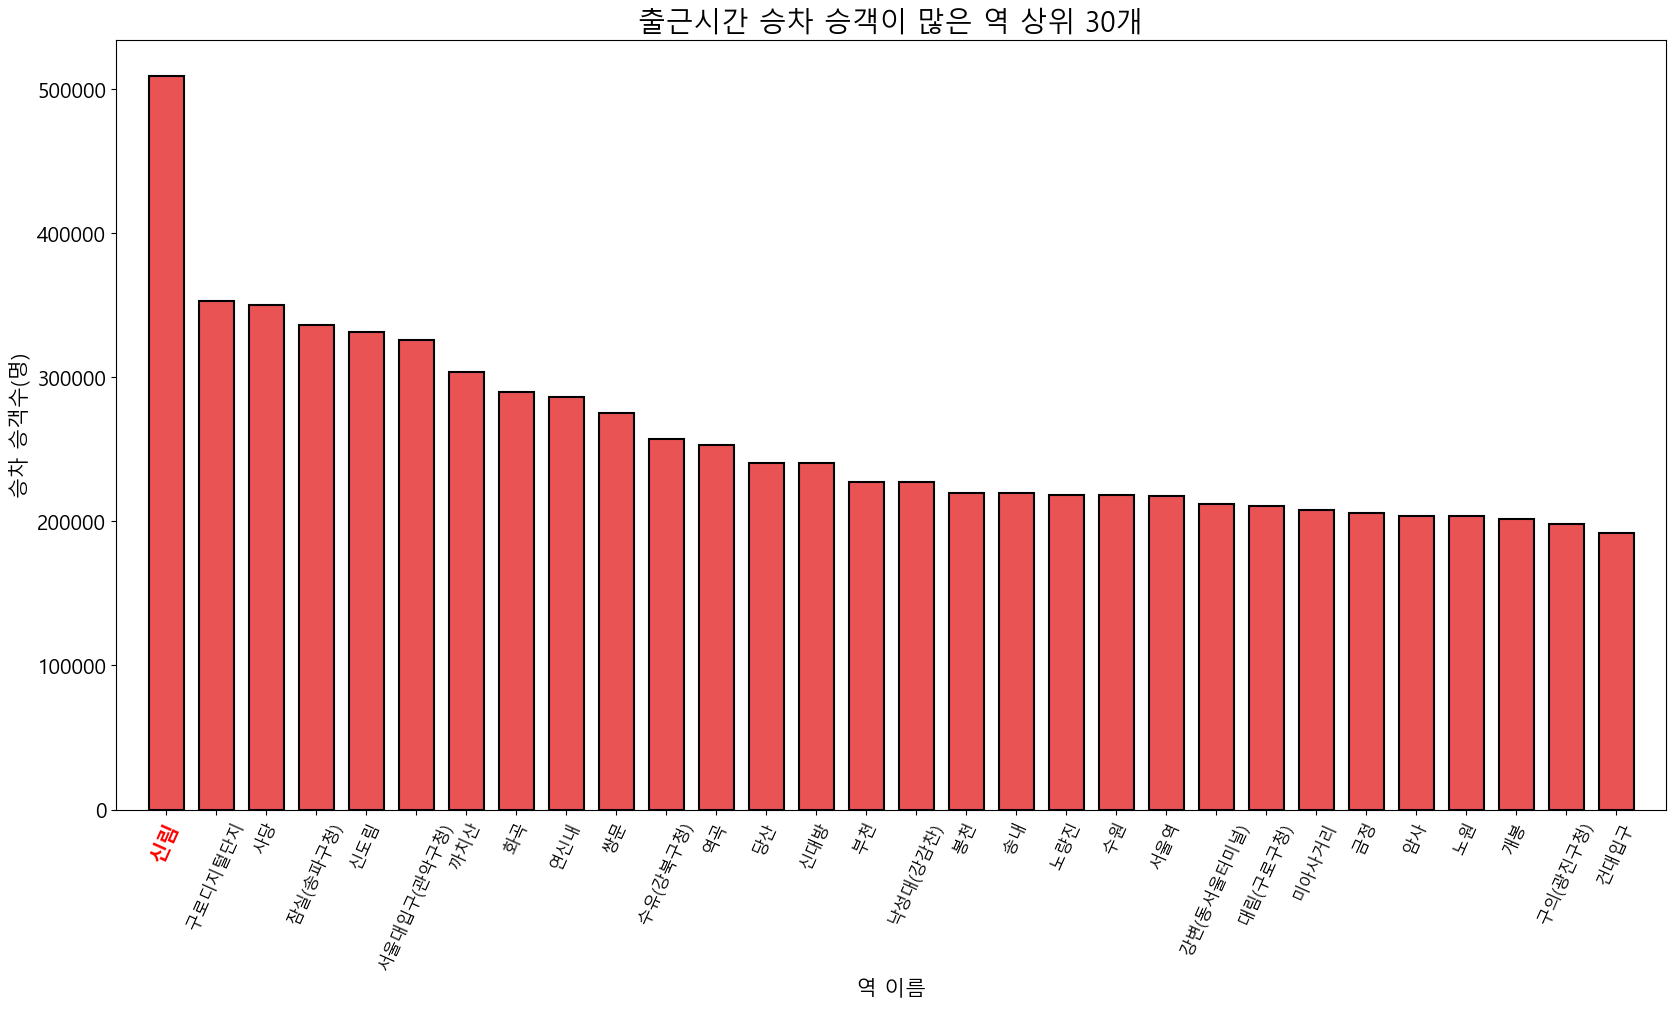

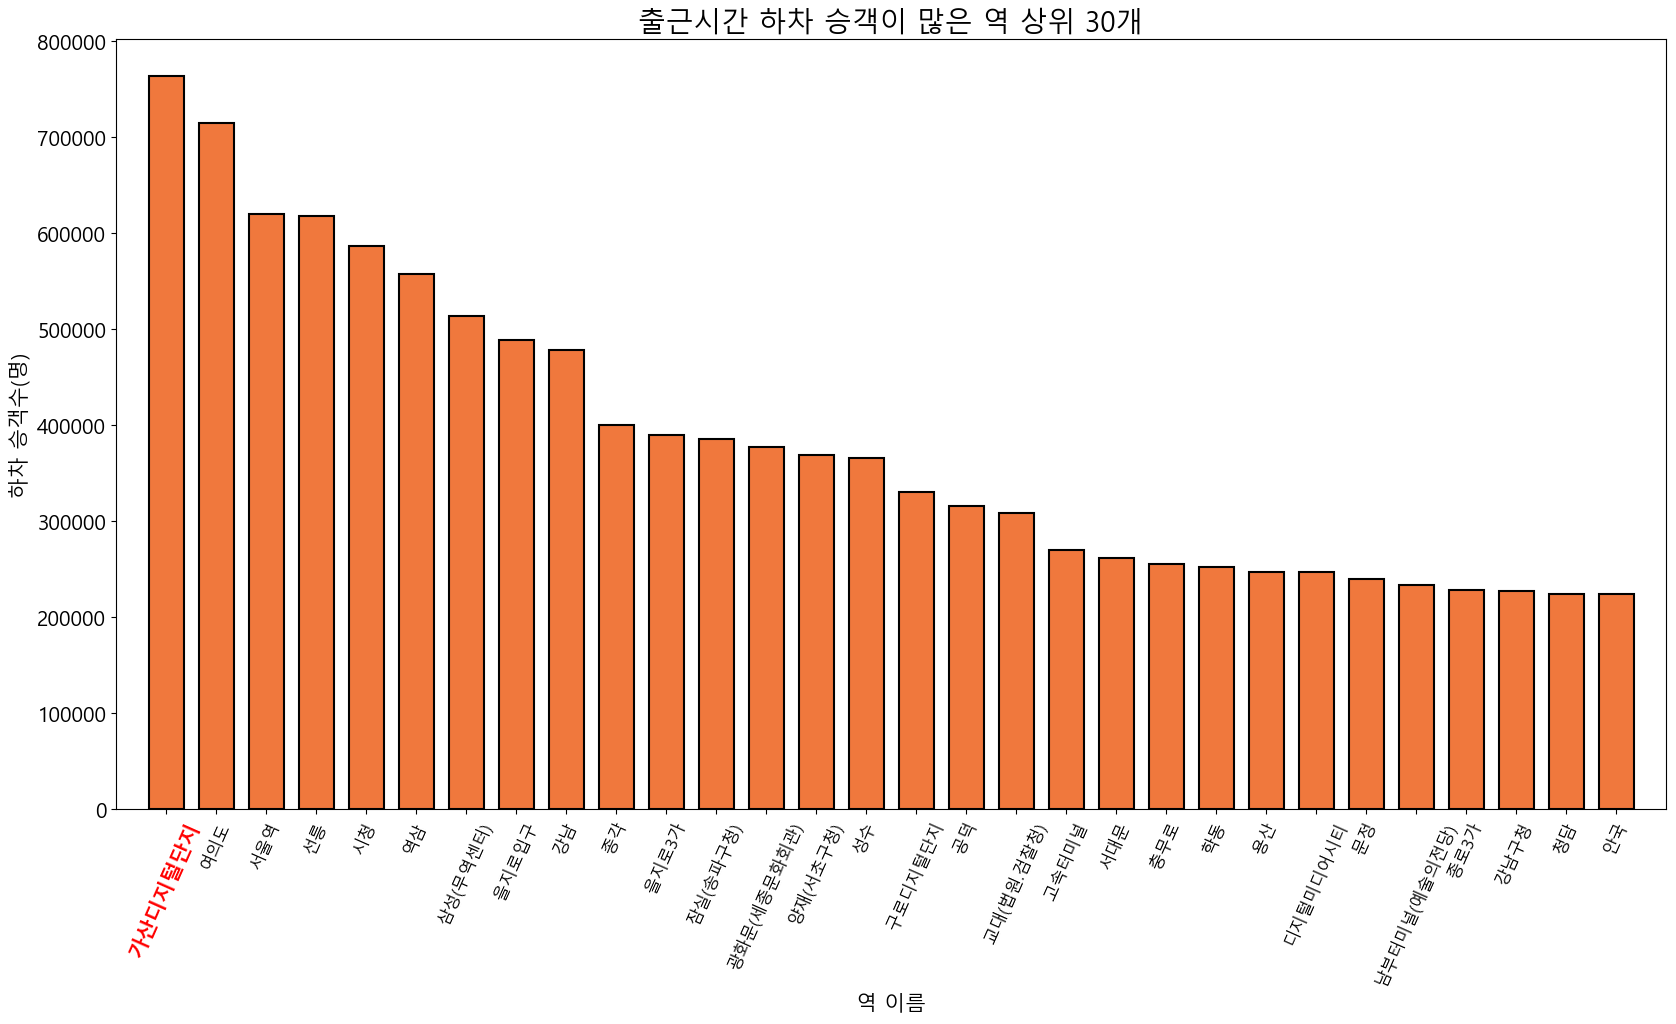

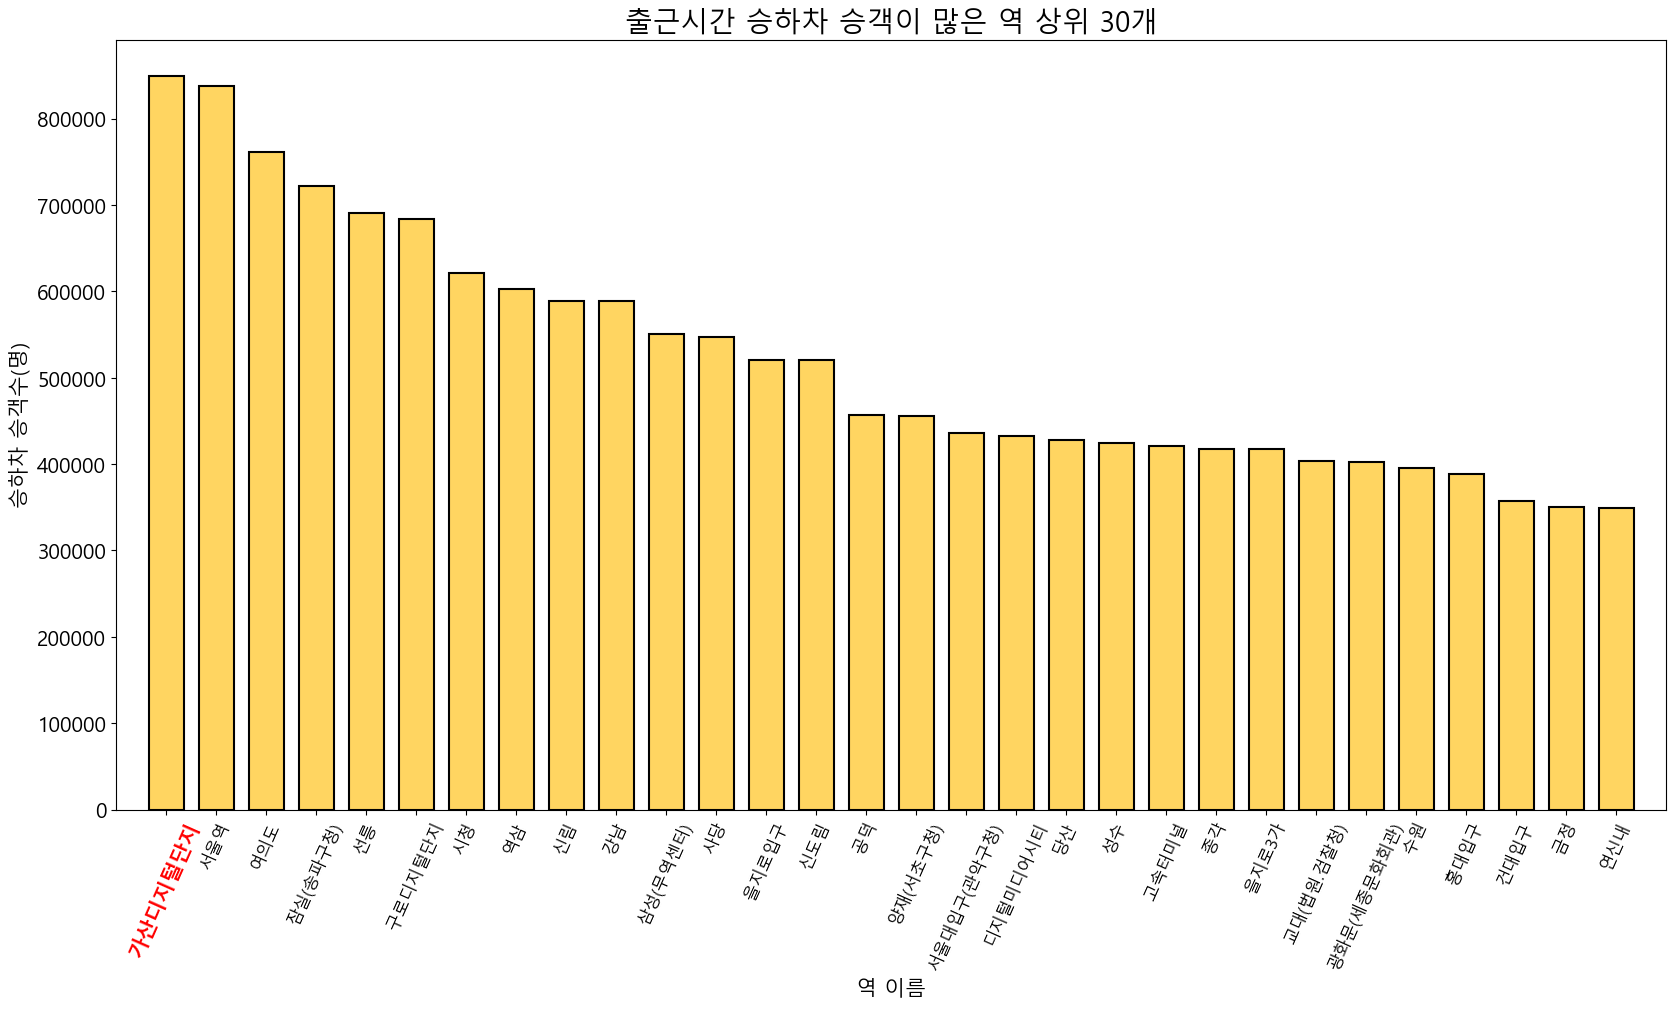

출근 시간대(07시~09시)에 사람들이 가장 많이 승차한 역은 신림역으로 총 508974명이 승차하였다.
출근 시간대(07시~09시)에 사람들이 가장 많이 하차한 역은 가산디지털단지역으로 총 763540명이 하차하였다.
출근 시간대(07시~09시)에 사람들이 가장 많이 승하차한 역은 가산디지털단지역으로 총 849144명이 승하차하였다.


In [109]:
import csv
import matplotlib.pyplot as plt

def main():
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False #한국어 깨짐 방지용 코드
    
    ins = {} #역 별 승차 승객수 저장용 딕셔너리
    outs = {} #역 별 하차 승객수 저장용 딕셔너리
    totals = {} #역 별 승하차 승객수 저장용 딕셔너리
    
    f = open('q4.csv', 'r', encoding='ansi')
    data = csv.reader(f)
    next(data)
    next(data)
    for row in data:
        for i in range(4,8): #승하차 승객 수에 대한 데이터를 정수형으로 변환
            row[i] = int(row[i])
        if row[3] in ins: # 읽어온 지하철 역의 이름이 기존의 지하철역과 겹칠 경우 승하차 승객 수를 하나로 합쳐서 저장
            ins[row[3]] += row[4] + row[6] #승차 승객수만 계산
            outs[row[3]] += row[5] + row[7] #하차 승객수만 계산
            totals[row[3]] += row[4] + row[5] + row[6] + row[7] #승하차 승객수를 모두 계산 
        else: #읽어온 지하철 역의 이름이 기존의 지하철역과 겹치지 않을 경우 지하철 역별 승하차 승객 수를 각각 저장
            ins[row[3]] = row[4] + row[6] #승차 승객수만 계산
            outs[row[3]] = row[5] + row[7] #하차 승객수만 계산
            totals[row[3]] = row[4] + row[5] + row[6] + row[7] #승하차 승객수를 모두 계산
            
    f.close()
    
    sortedin = sorted(ins.items(), key=lambda x: x[1], reverse=True)[:30] 
    #ins를 value를 기준으로 내림차순으로 정렬한 후 상위 30개의 항목만 뽑아서 저장한 딕셔너리
    sortedout = sorted(outs.items(), key=lambda x: x[1], reverse=True)[:30]
    #outs를 value를 기준으로 내림차순으로 정렬한 후 상위 30개의 항목만 뽑아서 저장한 딕셔너리
    sortedtotal = sorted(totals.items(), key=lambda x: x[1], reverse=True)[:30] 
    #totals를 value를 기준으로 내림차순으로 정렬한 후 상위 30개의 항목만 뽑아서 저장한 딕셔너리
    
    instations = [item[0] for item in sortedin] #그래프의 x축에 사용하기 위해 sortedin에서 역 이름만 뽑아서 저장
    invalues = [item[1] for item in sortedin] #그래프의 y축에 사용하기 위해 sortedin에서 승차 승객수만 뽑아서 저장
    outstations = [item[0] for item in sortedout] #그래프의 x축에 사용하기 위해 sortedout에서 역 이름만 뽑아서 저장
    outvalues = [item[1] for item in sortedout] #그래프의 y축에 사용하기 위해 sortedout에서 하차 승객수만 뽑아서 저장
    totalstations = [item[0] for item in sortedtotal] #그래프의 x축에 사용하기 위해 sortedtotal에서 역 이름만 뽑아서 저장
    totalvalues = [item[1] for item in sortedtotal] #그래프의 y축에 사용하기 위해 sortedtotal에서 승하차 승객수만 뽑아서 저장
    
    plt.figure(figsize=(20, 10)) #그래프 크게 출력
    plt.bar(instations, invalues, width=0.7, linewidth=1.5, edgecolor='black', color='#ea5353')
    #그래프의 가독성 향상을 위해 막대의 두께, 테두리의 두께, 테두리의 색, 그래프의 색을 지정
    plt.yticks(fontsize=15) #y축 눈금 값의 폰트 크기 키우기
    plt.xticks(fontsize=12, rotation=66) #x축 눈금 값의 폰트 크기 키우기, x축 눈금 값을 66도 만큼 회전
    plt.gca().get_xticklabels()[0].set_color("red")
    plt.gca().get_xticklabels()[0].set_fontsize('15')
    plt.gca().get_xticklabels()[0].set_weight('bold')
    plt.xlim(-1, 30) #x축의 시작과 끝 범위 지정
    plt.title("출근시간 승차 승객이 많은 역 상위 30개", fontsize=20)
    plt.xlabel('역 이름', fontsize=15) #x축은 승차 승객 수 상위 30개 역의 이름을 의미
    plt.ylabel('승차 승객수(명)', fontsize=15) #y축은 승차 승객 수 상위 30개 역의 승차 승객수를 의미
    plt.show() #그래프 그리기
    
    plt.figure(figsize=(20, 10))
    plt.bar(outstations, outvalues, width=0.7, linewidth=1.5, edgecolor='black', color='#f0783d')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=12, rotation=66)
    plt.gca().get_xticklabels()[0].set_color("red")
    plt.gca().get_xticklabels()[0].set_fontsize('15')
    plt.gca().get_xticklabels()[0].set_weight('bold')
    plt.xlim(-1, 30)
    plt.title("출근시간 하차 승객이 많은 역 상위 30개", fontsize=20)
    plt.xlabel('역 이름', fontsize=15) #x축은 하차 승객 수 상위 30개 역의 이름을 의미
    plt.ylabel('하차 승객수(명)', fontsize=15) #y축은 하차 승객 수 상위 30개 역의 하차 승객수를 의미
    plt.show()
    
    plt.figure(figsize=(20, 10))
    plt.bar(totalstations, totalvalues, width=0.7, linewidth=1.5, edgecolor='black', color='#ffd561')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=12, rotation=66)
    plt.gca().get_xticklabels()[0].set_color("red")
    plt.gca().get_xticklabels()[0].set_fontsize('15')
    plt.gca().get_xticklabels()[0].set_weight('bold')
    plt.xlim(-1, 30)
    plt.title("출근시간 승하차 승객이 많은 역 상위 30개", fontsize=20)
    plt.xlabel('역 이름', fontsize=15) #x축은 승하차 승객 수 상위 30개 역의 이름을 의미
    plt.ylabel('승하차 승객수(명)', fontsize=15) #y축은 승하차 승객 수 상위 30개 역의 승하차 승객수를 의미
    plt.show()
    
    print("출근 시간대(07시~09시)에 사람들이 가장 많이 승차한 역은 {0}역으로 총 {1}명이 승차하였다."
          .format(instations[0],invalues[0]))
    print("출근 시간대(07시~09시)에 사람들이 가장 많이 하차한 역은 {0}역으로 총 {1}명이 하차하였다."
          .format(outstations[0],outvalues[0]))
    print("출근 시간대(07시~09시)에 사람들이 가장 많이 승하차한 역은 {0}역으로 총 {1}명이 승하차하였다."
          .format(totalstations[0],totalvalues[0]))
    
if __name__ == "__main__":
    main()